In [58]:
import numpy as np
import pandas as pd

# Junho


In [59]:
junho = pd.read_csv('/Users/guilistocco/Documents/TCC 2 - Ônibus/BancoDados/Dados brutos/passengers_junho.csv',
                    index_col= 'Unnamed: 0')

    #  Sao 214k linhas

<img src="/Users/guilistocco/Documents/TCC 2 - Ônibus/BancoDados/Imagens/Captura de Tela 2022-09-07 às 10.45.10.png" alt="Estrutura de Dados" />

In [60]:
junho

,device_id,timestampI,timestampF,MAC,RSSI,channel,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,id,duration
0,617.0,1622529842,1622529920,40:06:a0:5b:8c:b2,-45,11,-22.827145,-47.061214,-22.829490,-47.060281,40,0,78
1,617.0,1622529842,1622529920,0c:ef:af:d3:00:36,-65,11,-22.827145,-47.061214,-22.829490,-47.060281,15,1,78
2,617.0,1622529847,1622529875,24:fd:0d:bd:91:49,-67,6,-22.826890,-47.061367,-22.826994,-47.061368,3,2,28
3,617.0,1622529850,1622529850,0e:ec:8d:d0:6d:0d,-90,7,-22.826730,-47.061454,-22.826730,-47.061454,2,3,0
4,617.0,1622529856,1622529856,0a:cc:27:40:31:3c,-87,4,-22.826406,-47.061626,-22.826406,-47.061626,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214541,NaN,1625079190,1625079190,22:ae:9f:77:09:55,-85,1,-22.816560,-47.072811,-22.816560,-47.072811,1,524,0
214542,NaN,1625079193,1625079196,50:92:b9:3b:a7:2a,-91,11,-22.816561,-47.072812,-22.816566,-47.072808,3,525,3
214543,NaN,1625079121,1625079121,ae:30:5e:57:df:56,-88,6,-22.816467,-47.072852,-22.816467,-47.072852,1,512,0
214544,NaN,1625079196,1625079196,28:16:7f:bc:c4:42,-93,6,-22.816566,-47.072808,-22.816566,-47.072808,1,526,0


## Limpeza dos dados

In [61]:
junho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214546 entries, 0 to 214545
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   device_id   106336 non-null  float64
 1   timestampI  214546 non-null  int64  
 2   timestampF  214546 non-null  int64  
 3   MAC         214546 non-null  object 
 4   RSSI        214546 non-null  int64  
 5   channel     214546 non-null  int64  
 6   latitudeI   214546 non-null  float64
 7   longitudeI  214546 non-null  float64
 8   latitudeF   214546 non-null  float64
 9   longitudeF  214546 non-null  float64
 10  cnt_pckg    214546 non-null  int64  
 11  id          214546 non-null  int64  
 12  duration    214546 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 22.9+ MB


In [62]:
junho['dataInicio'] = pd.to_datetime(junho['timestampI'], unit='s')
junho['dataFim'] = pd.to_datetime(junho['timestampF'], unit='s')

In [63]:
junho = junho[['MAC',  'device_id','latitudeI', 'longitudeI', 'latitudeF', 'longitudeF', 'cnt_pckg', 
       'duration', 'dataInicio', 'dataFim']]

## Analise sobre Frequencia das data

In [64]:
junho[['dataInicio', 'dataFim']].describe()

/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_2682/2457116788.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  junho[['dataInicio', 'dataFim']].describe()
/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_2682/2457116788.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  junho[['dataInicio', 'dataFim']].describe()


,dataInicio,dataFim
count,214546,214546
unique,154632,155121
top,2021-06-09 09:14:09,2021-06-18 14:30:38
freq,19,18
first,2021-06-01 06:44:02,2021-06-01 06:44:10
last,2021-06-30 18:53:17,2021-06-30 18:53:21


#### quantidade tentativas de conexao por dia
 - Da pra ver claramente que nao sao todos os dias que estao representados no dataset

 Faltam os dias 3, 4, 5, 6, 12, 19, 26, 27

In [65]:
junho['dataInicio'].dt.day.value_counts().sort_index()

1      7926
2     13836
7     12315
8     14311
9     14839
10    14351
11    12709
13      607
14    13735
15    13101
16    15878
17    12180
18    12484
20      660
21     6166
22     5673
23     5476
24    13585
25     5672
28     6594
29     6301
30     6147
Name: dataInicio, dtype: int64

## [JUNHO] Analise de tentativas de conexao por MAC/usuario
 - sao ~76k Usuarios unicos 
 - A maioria deles tem pouquissimos tentativas de conexao
    - Com minimo de tentativas de conexao em 0 temos  75897 MACs/usuarios
    - Com minimo de tentativas de conexao em 50 temos  567 MACs/usuarios
    - Com minimo de tentativas de conexao em 100 temos  287 MACs/usuarios
    - Com minimo de tentativas de conexao em 150 temos  173 MACs/usuarios
    - Com minimo de tentativas de conexao em 200 temos  108 MACs/usuarios
    - Com minimo de tentativas de conexao em 250 temos  63 MACs/usuarios

In [66]:
junho['MAC'].value_counts()

f8:b7:e2:c2:98:00    378
27:00:80:00:d2:1e    378
f8:b7:e2:c2:ac:a0    378
84:18:3a:4a:d3:68    377
80:80:05:80:80:80    376
                    ... 
04:d4:c4:a3:e2:91      1
2e:ff:de:d8:71:a1      1
0e:c8:20:47:e5:d3      1
e2:b9:99:dc:39:ad      1
22:ae:9f:77:09:55      1
Name: MAC, Length: 75897, dtype: int64

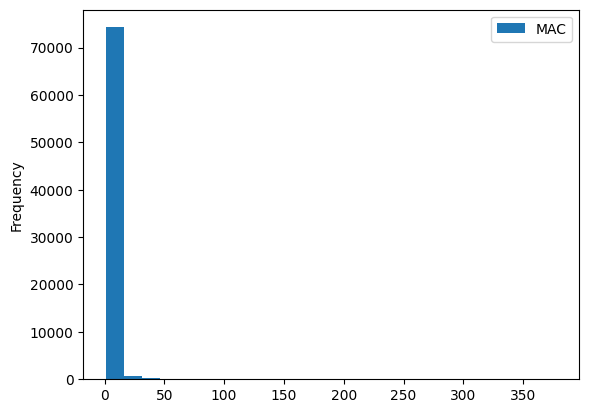

In [67]:
pd.DataFrame(junho['MAC'].value_counts()).plot(kind='hist', bins = 25);

In [68]:
junho['MAC'].value_counts().describe()

count    75897.000000
mean         2.826805
std         13.827772
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        378.000000
Name: MAC, dtype: float64

In [69]:
junho[junho['MAC'].isna()]

,MAC,device_id,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim


In [70]:
junho[junho['device_id'].isna()]

,MAC,device_id,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim
30,0c:ef:af:d3:00:1e,NaN,-22.816002,-47.072620,-22.816564,-47.072831,148,1925,2021-06-01 07:29:43,2021-06-01 08:01:48
31,f0:b5:d1:5d:08:6e,NaN,-22.816002,-47.072620,-22.816599,-47.072832,53,1927,2021-06-01 07:29:43,2021-06-01 08:01:50
32,0e:ef:af:03:00:78,NaN,-22.816002,-47.072620,-22.816329,-47.072638,5,42,2021-06-01 07:29:43,2021-06-01 07:30:25
33,e0:10:7f:28:c8:98,NaN,-22.815990,-47.072627,-22.814259,-47.071858,3,1800,2021-06-01 07:29:47,2021-06-01 07:59:47
34,a8:16:d0:3f:59:d3,NaN,-22.816030,-47.072630,-22.816325,-47.072630,14,72,2021-06-01 07:29:52,2021-06-01 07:31:04
...,...,...,...,...,...,...,...,...,...,...
214541,22:ae:9f:77:09:55,NaN,-22.816560,-47.072811,-22.816560,-47.072811,1,0,2021-06-30 18:53:10,2021-06-30 18:53:10
214542,50:92:b9:3b:a7:2a,NaN,-22.816561,-47.072812,-22.816566,-47.072808,3,3,2021-06-30 18:53:13,2021-06-30 18:53:16
214543,ae:30:5e:57:df:56,NaN,-22.816467,-47.072852,-22.816467,-47.072852,1,0,2021-06-30 18:52:01,2021-06-30 18:52:01
214544,28:16:7f:bc:c4:42,NaN,-22.816566,-47.072808,-22.816566,-47.072808,1,0,2021-06-30 18:53:16,2021-06-30 18:53:16


In [71]:
distribuicao_junho = pd.DataFrame(junho['MAC'].value_counts())
distribuicao_junho

,MAC
f8:b7:e2:c2:98:00,378
27:00:80:00:d2:1e,378
f8:b7:e2:c2:ac:a0,378
84:18:3a:4a:d3:68,377
80:80:05:80:80:80,376
...,...
04:d4:c4:a3:e2:91,1
2e:ff:de:d8:71:a1,1
0e:c8:20:47:e5:d3,1
e2:b9:99:dc:39:ad,1


#### Conclusao da distribuicao_junho
 

In [72]:
distribuicao_junho.describe(percentiles=[ .25, .5, .75, .80, .85, .90, .95])

,MAC
count,75897.000000
mean,2.826805
std,13.827772
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
80%,1.000000
85%,2.000000
90%,3.000000


In [73]:
for limite in range (1,11):
    print( 'Com limite {} temos '.format(limite),distribuicao_junho.loc[distribuicao_junho['MAC']>limite].shape[0], 'MACs Unicos' )

Com limite 1 temos  11438 MACs Unicos
Com limite 2 temos  7893 MACs Unicos
Com limite 3 temos  6197 MACs Unicos
Com limite 4 temos  5116 MACs Unicos
Com limite 5 temos  4329 MACs Unicos
Com limite 6 temos  3791 MACs Unicos
Com limite 7 temos  3358 MACs Unicos
Com limite 8 temos  2996 MACs Unicos
Com limite 9 temos  2691 MACs Unicos
Com limite 10 temos  2469 MACs Unicos


In [74]:
for limite in range (0,300,50):
    print( ' - Com minimo de tentativas de conexao em {} temos '.format(limite),distribuicao_junho.loc[distribuicao_junho['MAC']>limite].shape[0], 'MACs/usuarios' )

 - Com minimo de tentativas de conexao em 0 temos  75897 MACs/usuarios
 - Com minimo de tentativas de conexao em 50 temos  567 MACs/usuarios
 - Com minimo de tentativas de conexao em 100 temos  287 MACs/usuarios
 - Com minimo de tentativas de conexao em 150 temos  173 MACs/usuarios
 - Com minimo de tentativas de conexao em 200 temos  108 MACs/usuarios
 - Com minimo de tentativas de conexao em 250 temos  63 MACs/usuarios


### A diferenciaçao entre os dois tipos de usuários
 - essa diferenciacao depende dos usuarios terem embarcados no Onibus ou nao
 - Dessa forma, alem do minimo tentativas de conexao deve-se observar os pings no mapa
 - Assim formam-se passageiros e nao passageiros

 #### Inicialmente 
   -   serao considerados, para um dia, o minimo de 50 pings 

In [75]:
mts_pings_index = distribuicao_junho.loc[distribuicao_junho['MAC']>50].index
mts_pings = junho.loc[junho['MAC'].isin(mts_pings_index)]
pcos_pings = junho.loc[~junho['MAC'].isin(set(mts_pings['MAC']))] 

## JUNHO - freq muitos Pings

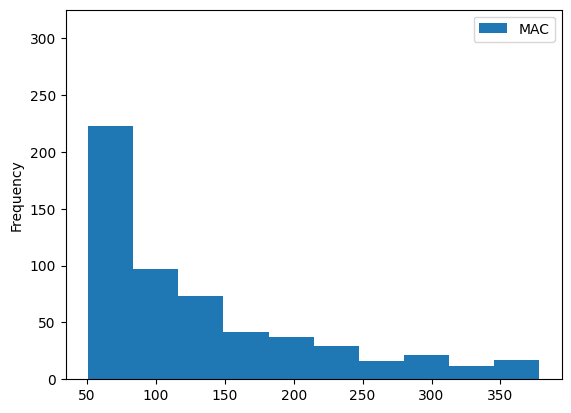

In [118]:
pd.DataFrame(distribuicao_junho.loc[distribuicao_junho['MAC']>50]).plot(kind='hist', ylim = (0,325));

In [77]:
junho

,MAC,device_id,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim
0,40:06:a0:5b:8c:b2,617.0,-22.827145,-47.061214,-22.829490,-47.060281,40,78,2021-06-01 06:44:02,2021-06-01 06:45:20
1,0c:ef:af:d3:00:36,617.0,-22.827145,-47.061214,-22.829490,-47.060281,15,78,2021-06-01 06:44:02,2021-06-01 06:45:20
2,24:fd:0d:bd:91:49,617.0,-22.826890,-47.061367,-22.826994,-47.061368,3,28,2021-06-01 06:44:07,2021-06-01 06:44:35
3,0e:ec:8d:d0:6d:0d,617.0,-22.826730,-47.061454,-22.826730,-47.061454,2,0,2021-06-01 06:44:10,2021-06-01 06:44:10
4,0a:cc:27:40:31:3c,617.0,-22.826406,-47.061626,-22.826406,-47.061626,2,0,2021-06-01 06:44:16,2021-06-01 06:44:16
...,...,...,...,...,...,...,...,...,...,...
214541,22:ae:9f:77:09:55,NaN,-22.816560,-47.072811,-22.816560,-47.072811,1,0,2021-06-30 18:53:10,2021-06-30 18:53:10
214542,50:92:b9:3b:a7:2a,NaN,-22.816561,-47.072812,-22.816566,-47.072808,3,3,2021-06-30 18:53:13,2021-06-30 18:53:16
214543,ae:30:5e:57:df:56,NaN,-22.816467,-47.072852,-22.816467,-47.072852,1,0,2021-06-30 18:52:01,2021-06-30 18:52:01
214544,28:16:7f:bc:c4:42,NaN,-22.816566,-47.072808,-22.816566,-47.072808,1,0,2021-06-30 18:53:16,2021-06-30 18:53:16


# Julho

In [78]:
julho = pd.read_csv('/Users/guilistocco/Documents/TCC 2 - Ônibus/BancoDados/Dados brutos/passengers_julho.csv',
                    index_col= 'Unnamed: 0')

    #  Sao 258k linhas

In [79]:
julho

,timestampI,timestampF,MAC,RSSI,channel,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,id,device_id,duration
0,1625124487,1625124494,f0:b5:d1:5d:08:6e,-42,11,-22.816117,-47.072760,-22.816467,-47.072818,12,0,NaN,7
1,1625124487,1625124493,0c:ef:af:d3:00:1e,-50,11,-22.816117,-47.072760,-22.816412,-47.072808,5,1,NaN,6
2,1625124489,1625124489,0c:f4:d5:15:84:e8,-70,1,-22.816188,-47.072782,-22.816188,-47.072782,2,2,NaN,0
3,1625124494,1625124494,5c:cf:7f:a4:84:9c,-57,11,-22.816467,-47.072818,-22.816467,-47.072818,2,3,NaN,0
4,1625124495,1625124495,e0:10:7f:2e:04:98,-77,6,-22.816513,-47.072823,-22.816513,-47.072823,2,4,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258638,1627673252,1627673252,a8:16:d0:e3:83:89,-84,5,-22.816417,-47.072804,-22.816417,-47.072804,13,395,NaN,0
258639,1627673253,1627673253,16:aa:a1:63:04:92,-85,12,-22.816416,-47.072803,-22.816416,-47.072803,4,396,NaN,0
258640,1627673257,1627673257,fa:f7:31:db:e6:6f,-90,9,-22.816414,-47.072801,-22.816414,-47.072801,3,397,NaN,0
258641,1627673259,1627673260,06:46:fc:e0:7e:3f,-92,2,-22.816412,-47.072801,-22.816411,-47.072800,8,398,NaN,1


## Limpeza dos dados

In [80]:
julho['dataInicio'] = pd.to_datetime(julho['timestampI'], unit='s')
julho['dataFim'] = pd.to_datetime(julho['timestampF'], unit='s')

In [81]:
julho = julho[['MAC', 'device_id', 'latitudeI', 'longitudeI', 'latitudeF', 'longitudeF', 'cnt_pckg', 
       'duration', 'dataInicio', 'dataFim']]

       


## Analise sobre Frequencia das data

In [82]:
julho[['dataInicio', 'dataFim']].describe()

/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_2682/379129181.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  julho[['dataInicio', 'dataFim']].describe()
/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_2682/379129181.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  julho[['dataInicio', 'dataFim']].describe()


,dataInicio,dataFim
count,258643,258643
unique,185201,185905
top,2021-07-15 13:14:55,2021-07-15 13:14:55
freq,20,19
first,2021-07-01 07:28:07,2021-07-01 07:28:09
last,2021-07-30 19:27:44,2021-07-30 19:27:48


#### quantidade tentativas de conexao por dia
 - Da pra ver claramente que nao sao todos os dias que estao representados no dataset

Faltam os dias 3,4,9, 10, 11, 17, 18, 24, 25, 31

In [83]:
julho['dataInicio'].dt.day.value_counts().sort_index()

1      7393
2     12550
5     12924
6     13629
7     15470
8      6114
12    14707
13     7599
14    12568
15    14681
16    14835
19    14389
20    15435
21    12254
22    14727
23    14273
26    14020
27    16482
28     5541
29     8252
30    10800
Name: dataInicio, dtype: int64

## [JULHO] Analise de tentativas de conexao por MAC/usuario
 - sao ~91k Usuarios unicos 
 - A maioria deles tem pouquissimos tentativas de conexao
   - Com minimo de tentativas de conexao em 0 temos  91432 MACs/usuarios
   - Com minimo de tentativas de conexao em 50 temos  663 MACs/usuarios
   - Com minimo de tentativas de conexao em 100 temos  344 MACs/usuarios
   - Com minimo de tentativas de conexao em 150 temos  232 MACs/usuarios
   - Com minimo de tentativas de conexao em 200 temos  152 MACs/usuarios
   - Com minimo de tentativas de conexao em 250 temos  99 MACs/usuarios


In [84]:
julho['MAC'].value_counts()

10:72:23:a9:1d:2f    474
98:fc:11:89:53:71    470
ec:fa:bc:1a:3a:b7    467
f0:b5:d1:5d:08:6e    465
c8:5d:38:90:c2:9b    462
                    ... 
f2:e0:5b:7a:af:56      1
da:a1:19:f8:25:64      1
44:1c:7f:05:e2:90      1
30:a1:fa:54:4a:ca      1
de:94:18:7d:2e:52      1
Name: MAC, Length: 91432, dtype: int64

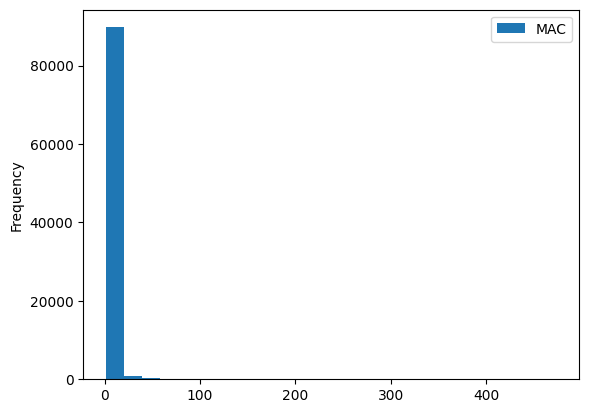

In [85]:
pd.DataFrame(julho['MAC'].value_counts()).plot(kind='hist', bins = 25);

In [86]:
julho['MAC'].value_counts().describe()

count    91432.000000
mean         2.828802
std         15.160429
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        474.000000
Name: MAC, dtype: float64

In [87]:
julho[julho['MAC'].isna()]

,MAC,device_id,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim


In [88]:
julho[julho['device_id'].isna()]

,MAC,device_id,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim
0,f0:b5:d1:5d:08:6e,NaN,-22.816117,-47.072760,-22.816467,-47.072818,12,7,2021-07-01 07:28:07,2021-07-01 07:28:14
1,0c:ef:af:d3:00:1e,NaN,-22.816117,-47.072760,-22.816412,-47.072808,5,6,2021-07-01 07:28:07,2021-07-01 07:28:13
2,0c:f4:d5:15:84:e8,NaN,-22.816188,-47.072782,-22.816188,-47.072782,2,0,2021-07-01 07:28:09,2021-07-01 07:28:09
3,5c:cf:7f:a4:84:9c,NaN,-22.816467,-47.072818,-22.816467,-47.072818,2,0,2021-07-01 07:28:14,2021-07-01 07:28:14
4,e0:10:7f:2e:04:98,NaN,-22.816513,-47.072823,-22.816513,-47.072823,2,0,2021-07-01 07:28:15,2021-07-01 07:28:15
...,...,...,...,...,...,...,...,...,...,...
258638,a8:16:d0:e3:83:89,NaN,-22.816417,-47.072804,-22.816417,-47.072804,13,0,2021-07-30 19:27:32,2021-07-30 19:27:32
258639,16:aa:a1:63:04:92,NaN,-22.816416,-47.072803,-22.816416,-47.072803,4,0,2021-07-30 19:27:33,2021-07-30 19:27:33
258640,fa:f7:31:db:e6:6f,NaN,-22.816414,-47.072801,-22.816414,-47.072801,3,0,2021-07-30 19:27:37,2021-07-30 19:27:37
258641,06:46:fc:e0:7e:3f,NaN,-22.816412,-47.072801,-22.816411,-47.072800,8,1,2021-07-30 19:27:39,2021-07-30 19:27:40


In [89]:
distribuicao_julho = pd.DataFrame(julho['MAC'].value_counts())
distribuicao_julho

,MAC
10:72:23:a9:1d:2f,474
98:fc:11:89:53:71,470
ec:fa:bc:1a:3a:b7,467
f0:b5:d1:5d:08:6e,465
c8:5d:38:90:c2:9b,462
...,...
f2:e0:5b:7a:af:56,1
da:a1:19:f8:25:64,1
44:1c:7f:05:e2:90,1
30:a1:fa:54:4a:ca,1


#### Conclusao da distribuicao_julho

 - 85% dos macs aparecem somente uma vez no MES (~77K)
 

In [90]:
distribuicao_julho.describe(percentiles=[ .25, .5, .75, .80, .85, .90, .95])

,MAC
count,91432.000000
mean,2.828802
std,15.160429
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
80%,1.000000
85%,1.000000
90%,2.000000


In [91]:
for limite in range (1,11):
    print( 'Com limite {} temos '.format(limite),distribuicao_julho.loc[distribuicao_julho['MAC']>limite].shape[0], 'MACs Unicos' )

Com limite 1 temos  12316 MACs Unicos
Com limite 2 temos  8473 MACs Unicos
Com limite 3 temos  6736 MACs Unicos
Com limite 4 temos  5641 MACs Unicos
Com limite 5 temos  4848 MACs Unicos
Com limite 6 temos  4263 MACs Unicos
Com limite 7 temos  3795 MACs Unicos
Com limite 8 temos  3415 MACs Unicos
Com limite 9 temos  3118 MACs Unicos
Com limite 10 temos  2879 MACs Unicos


In [92]:
for limite in range (0,300,50):
    print( ' - Com minimo de tentativas de conexao em {} temos '.format(limite),distribuicao_julho.loc[distribuicao_julho['MAC']>limite].shape[0], 'MACs/usuarios' )

 - Com minimo de tentativas de conexao em 0 temos  91432 MACs/usuarios
 - Com minimo de tentativas de conexao em 50 temos  663 MACs/usuarios
 - Com minimo de tentativas de conexao em 100 temos  344 MACs/usuarios
 - Com minimo de tentativas de conexao em 150 temos  232 MACs/usuarios
 - Com minimo de tentativas de conexao em 200 temos  152 MACs/usuarios
 - Com minimo de tentativas de conexao em 250 temos  99 MACs/usuarios


### A diferenciaçao entre os dois tipos de usuários
 - essa diferenciacao depende dos usuarios terem embarcados no Onibus ou nao
 - Dessa forma, alem do minimo tentativas de conexao deve-se observar os tentativas de conexao no mapa
 - Assim formam-se passageiros e nao passageiros

 #### Inicialmente 
   -   serao considerados, para um dia, o minimo de 50 tentativas de conexao 

In [93]:
mts_pings_index = distribuicao_julho.loc[distribuicao_julho['MAC']>50].index
mts_pings = junho.loc[junho['MAC'].isin(mts_pings_index)]
pcos_pings = junho.loc[~junho['MAC'].isin(set(mts_pings['MAC']))] 

## JULHO - freq muitos Pings

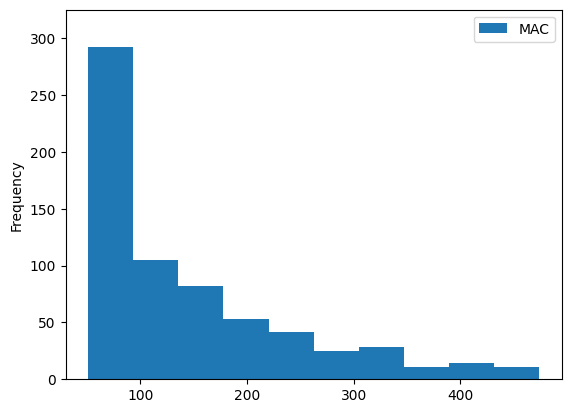

In [117]:
pd.DataFrame(distribuicao_julho.loc[distribuicao_julho['MAC']>50]).plot(kind='hist', ylim = (0,325));

In [95]:
julho

,MAC,device_id,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim
0,f0:b5:d1:5d:08:6e,NaN,-22.816117,-47.072760,-22.816467,-47.072818,12,7,2021-07-01 07:28:07,2021-07-01 07:28:14
1,0c:ef:af:d3:00:1e,NaN,-22.816117,-47.072760,-22.816412,-47.072808,5,6,2021-07-01 07:28:07,2021-07-01 07:28:13
2,0c:f4:d5:15:84:e8,NaN,-22.816188,-47.072782,-22.816188,-47.072782,2,0,2021-07-01 07:28:09,2021-07-01 07:28:09
3,5c:cf:7f:a4:84:9c,NaN,-22.816467,-47.072818,-22.816467,-47.072818,2,0,2021-07-01 07:28:14,2021-07-01 07:28:14
4,e0:10:7f:2e:04:98,NaN,-22.816513,-47.072823,-22.816513,-47.072823,2,0,2021-07-01 07:28:15,2021-07-01 07:28:15
...,...,...,...,...,...,...,...,...,...,...
258638,a8:16:d0:e3:83:89,NaN,-22.816417,-47.072804,-22.816417,-47.072804,13,0,2021-07-30 19:27:32,2021-07-30 19:27:32
258639,16:aa:a1:63:04:92,NaN,-22.816416,-47.072803,-22.816416,-47.072803,4,0,2021-07-30 19:27:33,2021-07-30 19:27:33
258640,fa:f7:31:db:e6:6f,NaN,-22.816414,-47.072801,-22.816414,-47.072801,3,0,2021-07-30 19:27:37,2021-07-30 19:27:37
258641,06:46:fc:e0:7e:3f,NaN,-22.816412,-47.072801,-22.816411,-47.072800,8,1,2021-07-30 19:27:39,2021-07-30 19:27:40


# Agosto 

In [96]:
agosto = pd.read_csv('/Users/guilistocco/Documents/TCC 2 - Ônibus/BancoDados/Dados brutos/passengers_agosto.csv',
                    index_col= 'Unnamed: 0')

    #  Sao 214k linhas

In [97]:
agosto

,device_id,timestampI,timestampF,MAC,RSSI,channel,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,id,duration
0,617.0,1627887032,1627888203,24:fd:0d:bd:91:49,-83,1,-22.827640,-47.061036,-22.823898,-47.063036,2,0,1171
1,617.0,1627887033,1627889664,40:06:a0:5b:8c:b2,-51,12,-22.827717,-47.061002,-22.829839,-47.060069,27,1,2631
2,617.0,1627887034,1627888255,78:04:73:0a:8d:90,-85,11,-22.827797,-47.060968,-22.827860,-47.060928,9,2,1221
3,617.0,1627887040,1627889664,0c:ef:af:d3:00:36,-62,11,-22.828329,-47.060821,-22.829839,-47.060069,94,6,2624
4,617.0,1627887069,1627888309,6e:f2:cc:ea:6a:64,-93,11,-22.829653,-47.060836,-22.829349,-47.062100,50,9,1240
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262086,NaN,1630437998,1630437998,70:ca:97:02:fa:e8,-96,11,-22.816053,-47.072787,-22.816053,-47.072787,2,406,0
262087,NaN,1630438003,1630438003,80:d0:4a:94:9b:1c,-85,6,-22.816329,-47.072811,-22.816329,-47.072811,2,407,0
262088,NaN,1630438006,1630438007,26:93:8f:55:ef:1c,-91,6,-22.816426,-47.072812,-22.816448,-47.072808,7,408,1
262089,NaN,1630438010,1630438031,68:02:b8:5d:41:da,-90,11,-22.816470,-47.072796,-22.816554,-47.072769,2,409,21


## Limpeza dos dados

In [98]:
agosto['dataInicio'] = pd.to_datetime(agosto['timestampI'], unit='s')
agosto['dataFim'] = pd.to_datetime(agosto['timestampF'], unit='s')


In [99]:
agosto = agosto[['MAC',  'device_id', 'latitudeI', 'longitudeI', 'latitudeF', 'longitudeF', 'cnt_pckg', 
       'duration', 'dataInicio', 'dataFim']]

## Analise sobre Frequencia das data

In [100]:
agosto[['dataInicio', 'dataFim']].describe()

/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_2682/25659445.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  agosto[['dataInicio', 'dataFim']].describe()
/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_2682/25659445.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  agosto[['dataInicio', 'dataFim']].describe()


,dataInicio,dataFim
count,262091,262091
unique,187602,188288
top,2021-08-16 13:30:29,2021-08-16 13:30:29
freq,38,38
first,2021-08-02 06:50:32,2021-08-02 06:50:39
last,2021-08-31 19:27:13,2021-08-31 19:27:13


#### quantidade tentativas de conexao por dia
 - Da pra ver claramente que nao sao todos os dias que estao representados no dataset

 Faltam os dias 1, 7, 8, 14, 15, 22, 28, 29

In [101]:
agosto['dataInicio'].dt.day.value_counts().sort_index()

2     13870
3     13786
4     13746
5      5043
6      6939
9      6933
10     6380
11    15168
12    12267
13     8890
16    12888
17    11425
18    14698
19    13768
20    14414
21      275
23    15610
24    14469
25    13326
26    14842
27    13116
30    12500
31     7738
Name: dataInicio, dtype: int64

## Analise de pings por MAC/usuario
 - sao ~93k Usuarios unicos 
 - A maioria deles tem pouquissimos pings
   - Com minimo de tentativas de conexao em 0 temos  93786 MACs/usuarios
   - Com minimo de tentativas de conexao em 50 temos  682 MACs/usuarios
   - Com minimo de tentativas de conexao em 100 temos  352 MACs/usuarios
   - Com minimo de tentativas de conexao em 150 temos  222 MACs/usuarios
   - Com minimo de tentativas de conexao em 200 temos  148 MACs/usuarios
   - Com minimo de tentativas de conexao em 250 temos  95 MACs/usuarios

In [102]:
agosto['MAC'].value_counts()

c8:5d:38:90:c2:9b    472
c8:5d:38:93:6a:51    471
ec:fa:bc:1a:3a:b7    463
10:72:23:a9:1d:2f    462
f0:b5:d1:5d:08:6e    459
                    ... 
46:04:79:20:60:66      1
4e:73:53:21:59:68      1
66:4e:27:0d:a7:77      1
fe:0c:23:18:bf:e8      1
2a:4f:61:f4:9d:59      1
Name: MAC, Length: 93786, dtype: int64

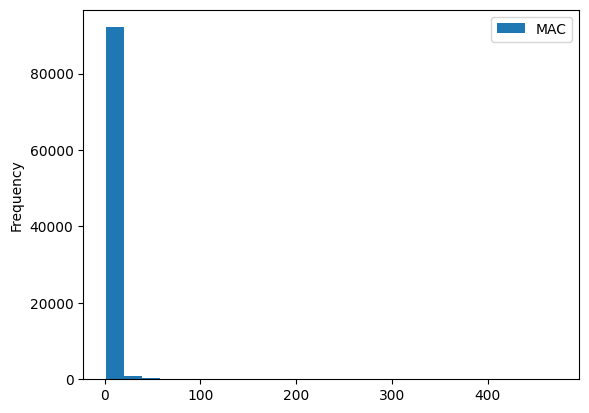

In [103]:
pd.DataFrame(agosto['MAC'].value_counts()).plot(kind='hist', bins = 25);

In [104]:
agosto['MAC'].value_counts().describe()

count    93786.000000
mean         2.794564
std         14.681580
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        472.000000
Name: MAC, dtype: float64

In [105]:
agosto[agosto['MAC'].isna()]

,MAC,device_id,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim


In [106]:
agosto[agosto['device_id'].isna()]

,MAC,device_id,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim
615,0e:ef:af:03:00:78,NaN,-22.816029,-47.072593,-22.816532,-47.072816,29,2445,2021-08-02 07:20:40,2021-08-02 08:01:25
616,5c:cf:7f:a4:84:9c,NaN,-22.816029,-47.072591,-22.816519,-47.072780,59,2495,2021-08-02 07:20:42,2021-08-02 08:02:17
617,0c:ef:af:d3:00:1e,NaN,-22.816029,-47.072591,-22.816518,-47.072771,75,2506,2021-08-02 07:20:42,2021-08-02 08:02:28
618,f0:b5:d1:5d:08:6e,NaN,-22.816029,-47.072591,-22.816518,-47.072771,70,2506,2021-08-02 07:20:42,2021-08-02 08:02:28
619,0e:ef:af:03:ce:32,NaN,-22.816029,-47.072590,-22.816195,-47.072488,25,468,2021-08-02 07:20:50,2021-08-02 07:28:38
...,...,...,...,...,...,...,...,...,...,...
262086,70:ca:97:02:fa:e8,NaN,-22.816053,-47.072787,-22.816053,-47.072787,2,0,2021-08-31 19:26:38,2021-08-31 19:26:38
262087,80:d0:4a:94:9b:1c,NaN,-22.816329,-47.072811,-22.816329,-47.072811,2,0,2021-08-31 19:26:43,2021-08-31 19:26:43
262088,26:93:8f:55:ef:1c,NaN,-22.816426,-47.072812,-22.816448,-47.072808,7,1,2021-08-31 19:26:46,2021-08-31 19:26:47
262089,68:02:b8:5d:41:da,NaN,-22.816470,-47.072796,-22.816554,-47.072769,2,21,2021-08-31 19:26:50,2021-08-31 19:27:11


In [107]:
distribuicao_agosto = pd.DataFrame(agosto['MAC'].value_counts())
distribuicao_agosto

,MAC
c8:5d:38:90:c2:9b,472
c8:5d:38:93:6a:51,471
ec:fa:bc:1a:3a:b7,463
10:72:23:a9:1d:2f,462
f0:b5:d1:5d:08:6e,459
...,...
46:04:79:20:60:66,1
4e:73:53:21:59:68,1
66:4e:27:0d:a7:77,1
fe:0c:23:18:bf:e8,1


#### Conclusao da distribuicao

 - 85% dos macs aparecem somente uma vez no MES (~79K)
 

In [108]:
distribuicao_agosto.describe(percentiles=[ .25, .5, .75, .80, .85, .90, .95])

,MAC
count,93786.000000
mean,2.794564
std,14.681580
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
80%,1.000000
85%,1.000000
90%,2.000000


In [109]:
for limite in range (1,11):
    print( 'Com limite {} temos '.format(limite),distribuicao_agosto.loc[distribuicao_agosto['MAC']>limite].shape[0], 'MACs Unicos' )

Com limite 1 temos  12702 MACs Unicos
Com limite 2 temos  8771 MACs Unicos
Com limite 3 temos  6985 MACs Unicos
Com limite 4 temos  5801 MACs Unicos
Com limite 5 temos  4994 MACs Unicos
Com limite 6 temos  4380 MACs Unicos
Com limite 7 temos  3874 MACs Unicos
Com limite 8 temos  3485 MACs Unicos
Com limite 9 temos  3169 MACs Unicos
Com limite 10 temos  2899 MACs Unicos


In [110]:
for limite in range (0,300,50):
    print( ' - Com minimo de tentativas de conexao em {} temos '.format(limite),distribuicao_agosto.loc[distribuicao_agosto['MAC']>limite].shape[0], 'MACs/usuarios' )

 - Com minimo de tentativas de conexao em 0 temos  93786 MACs/usuarios
 - Com minimo de tentativas de conexao em 50 temos  682 MACs/usuarios
 - Com minimo de tentativas de conexao em 100 temos  352 MACs/usuarios
 - Com minimo de tentativas de conexao em 150 temos  222 MACs/usuarios
 - Com minimo de tentativas de conexao em 200 temos  148 MACs/usuarios
 - Com minimo de tentativas de conexao em 250 temos  95 MACs/usuarios


### A diferenciaçao entre os dois tipos de usuários
 - essa diferenciacao depende dos usuarios terem embarcados no Onibus ou nao
 - Dessa forma, alem do minimo tentativas de conexao deve-se observar os tentativas de conexao no mapa
 - Assim formam-se passageiros e nao passageiros

 #### Inicialmente 
   -   serao considerados, para um dia, o minimo de 50 tentativas de conexao 

In [111]:
mts_pings_index = distribuicao_agosto.loc[distribuicao_agosto['MAC']>50].index
mts_pings = agosto.loc[agosto['MAC'].isin(mts_pings_index)]
pcos_pings = agosto.loc[~agosto['MAC'].isin(set(mts_pings['MAC']))] 

## AGOSTO - freq muitos Pings

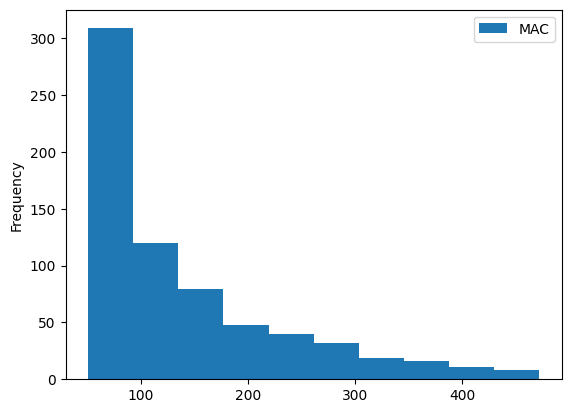

In [116]:
pd.DataFrame(distribuicao_agosto.loc[distribuicao_agosto['MAC']>50]).plot(kind='hist', ylim = (0,325));